In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:

# Load datasets
customers = pd.read_csv("C:/Users/santh/Downloads/Customers.csv")
products = pd.read_csv('C:/Users/santh/Downloads/Products.csv')
transactions = pd.read_csv('C:/Users/santh/Downloads/Transactions.csv')

In [9]:
print(transactions.info())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.5

In [10]:
Price = int(transactions['Price'])

TypeError: cannot convert the series to <class 'int'>

In [15]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate  DaysSinceSignup
0      C0001    Lawrence Carroll  South America 2022-07-10              932
1      C0002      Elizabeth Lutz           Asia 2022-02-13             1079
2      C0003      Michael Rivera  South America 2024-03-07              326
3      C0004  Kathleen Rodriguez  South America 2022-10-09              841
4      C0005         Laura Weber           Asia 2022-08-15              896
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54

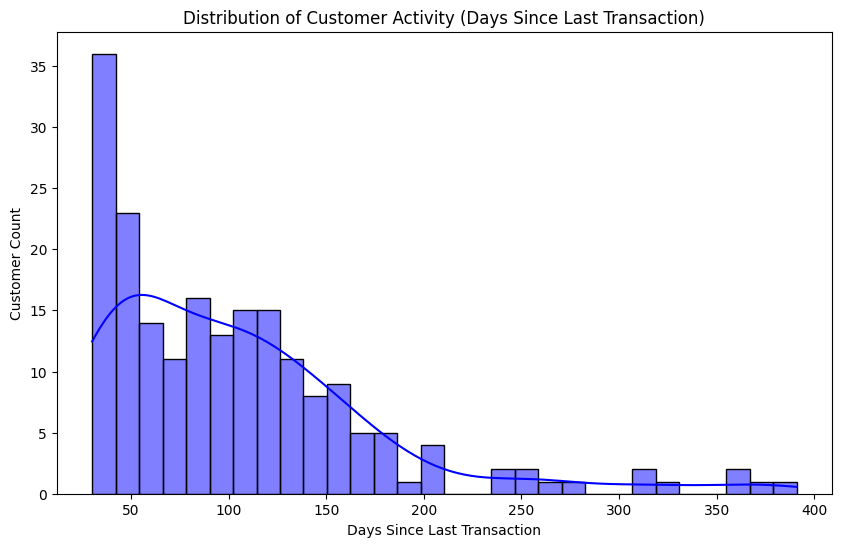

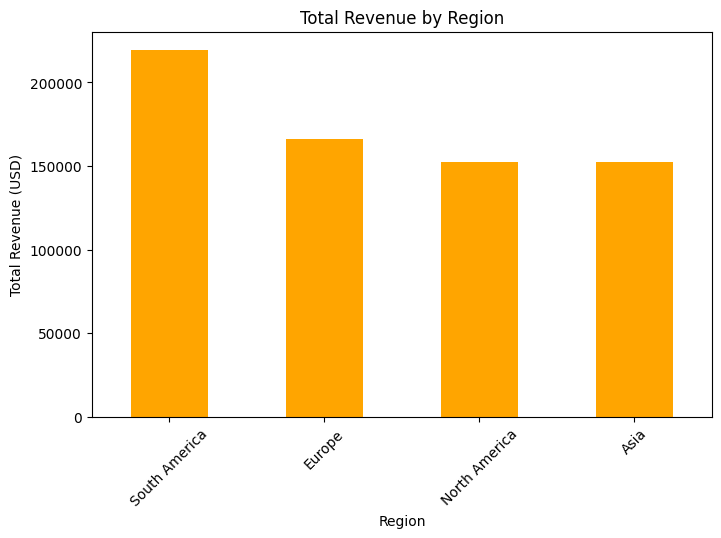

C:\Users\santh\AppData\Local\Temp\ipykernel_17044\1169461327.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


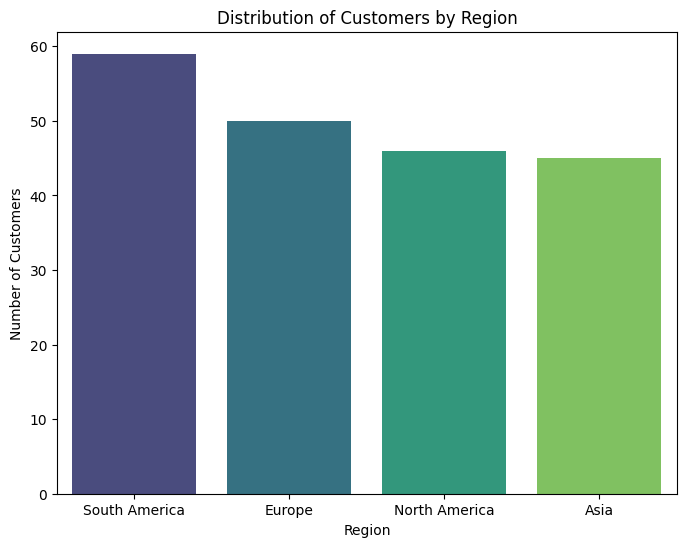

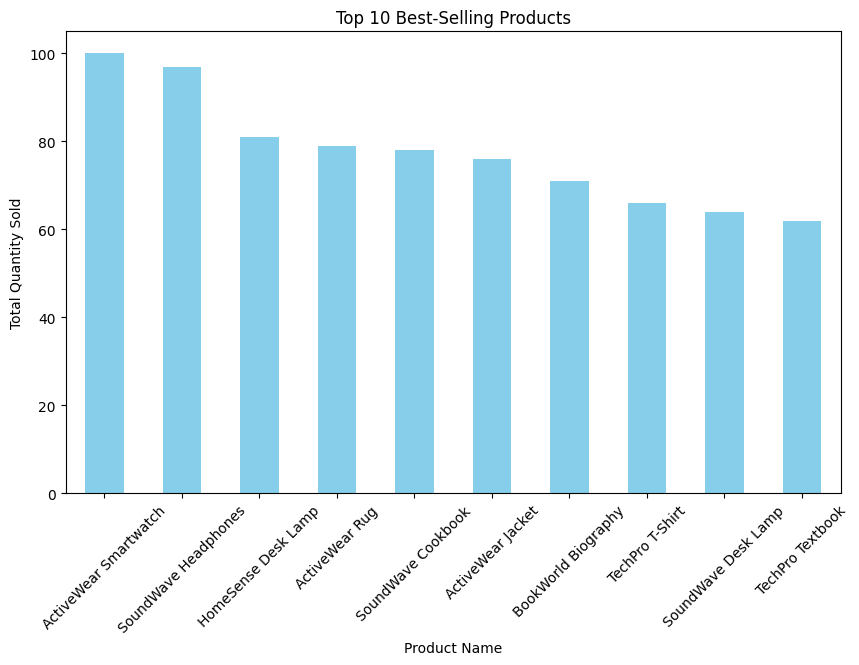

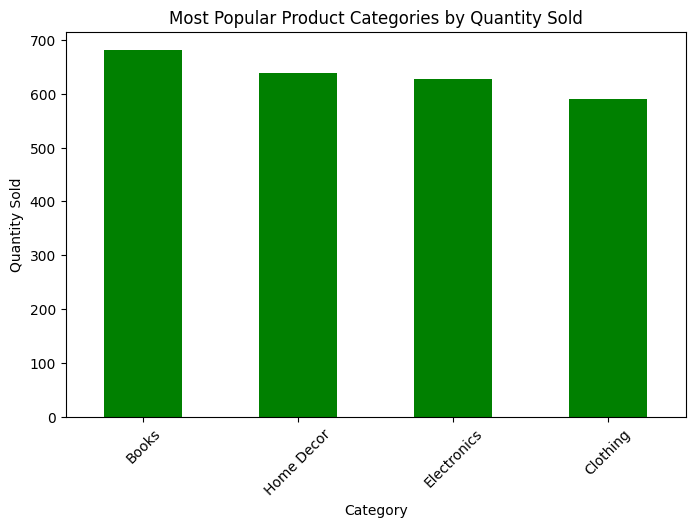

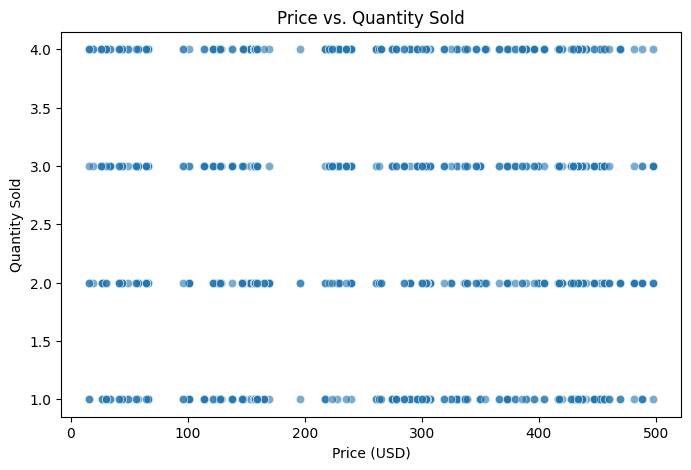

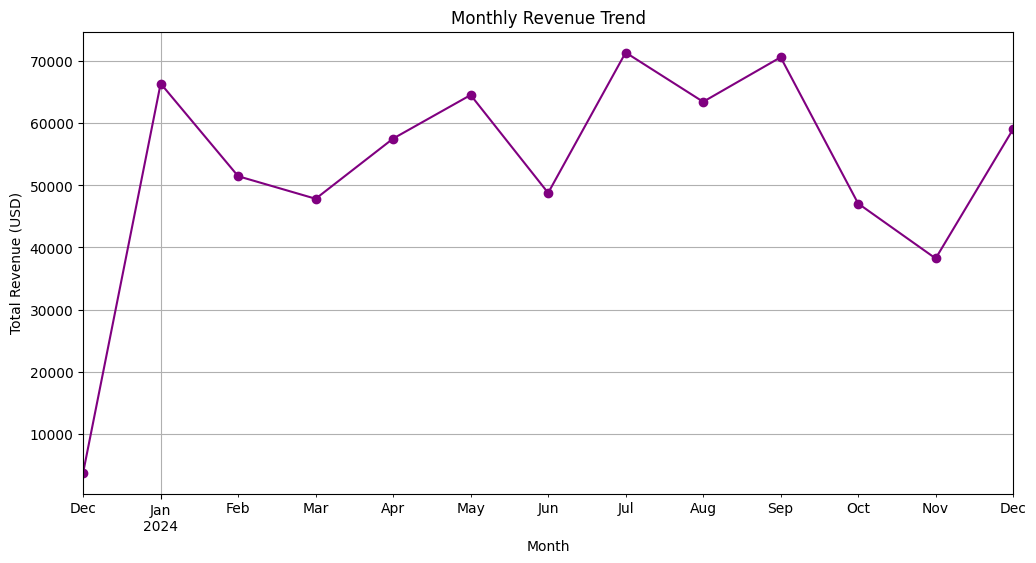

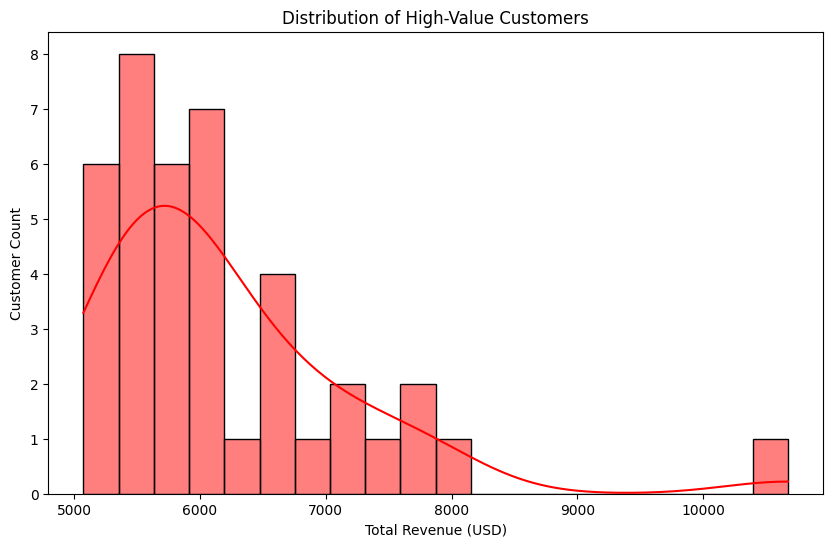

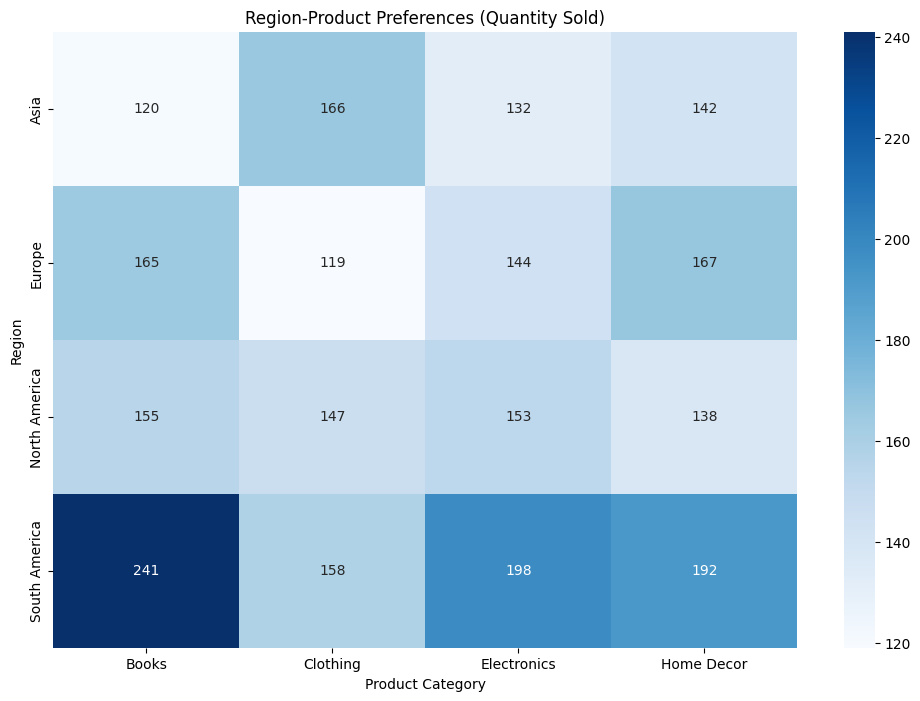

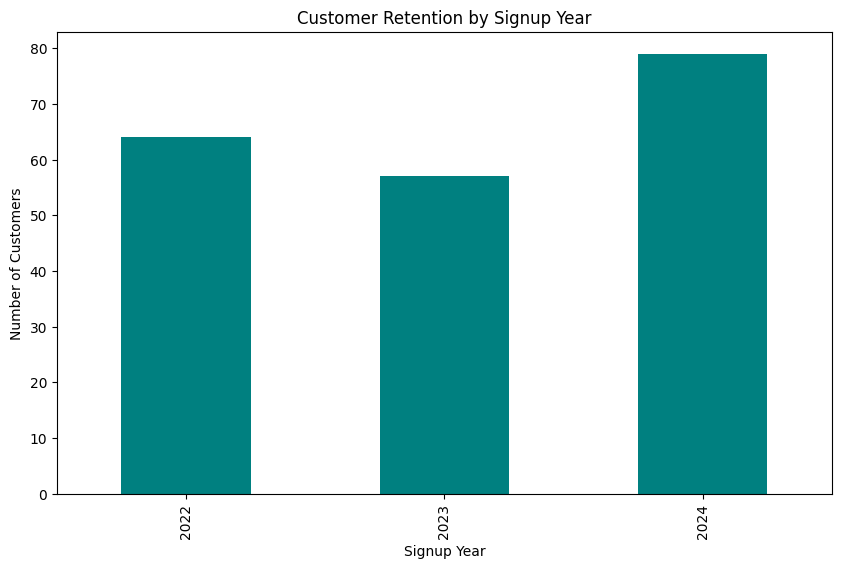

EDA Completed. Insights and visualizations generated.


In [19]:


# Clean and preprocess data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# 1. Customer Analysis
# Active vs. Dormant Customers
today = datetime.today()
customers['DaysSinceSignup'] = (today - customers['SignupDate']).dt.days
active_customers = merged_data.groupby('CustomerID')['TransactionDate'].max()
active_customers = (today - active_customers).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(active_customers, kde=True, bins=30, color='blue')
plt.title('Distribution of Customer Activity (Days Since Last Transaction)')
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Customer Count')
plt.show()

# Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


# 1. Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# 2. Top-selling products
top_selling_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# 2. Product Analysis
# Popular Product Categories
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='green')
plt.title('Most Popular Product Categories by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Price vs. Quantity Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Price_x', y='Quantity', alpha=0.6)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()

# 3. Transaction Analysis
# Monthly Transaction Trends
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color='purple')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()

# High-Value Customers
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum()
high_value_customers = customer_revenue[customer_revenue > customer_revenue.quantile(0.8)]

plt.figure(figsize=(10, 6))
sns.histplot(high_value_customers, kde=True, color='red', bins=20)
plt.title('Distribution of High-Value Customers')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer Count')
plt.show()

# 4. Cross-Dimensional Insights
# Region-Product Preferences
region_category = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(region_category, annot=True, fmt='g', cmap='Blues')
plt.title('Region-Product Preferences (Quantity Sold)')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()

# Customer Retention by Signup Date
signup_retention = customers.groupby(customers['SignupDate'].dt.year)['CustomerID'].count()
plt.figure(figsize=(10, 6))
signup_retention.plot(kind='bar', color='teal')
plt.title('Customer Retention by Signup Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()

# Save merged data for predictive modeling in Task 2
merged_data.to_csv('Merged_eCommerce_Data.csv', index=False)

print("EDA Completed. Insights and visualizations generated.")

In [12]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'DaysSinceSignup', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


task2